In [1]:
import os
os.chdir(r'C:\CholecT50-Challenge-Validation\cholect50-challenge-val')
import pandas as pd

annotations_file_path = 'annotations/annotations.csv'
annotations_df = pd.read_csv(annotations_file_path)

annotations_df.head()

,filename,width,height,label,xmin,ymin,xmax,ymax
0,000023.png,774,434,Infected,285,178,540,361
1,000023.png,774,434,Non-Infected,129,8,708,137
2,000023.png,774,434,Non-Infected,81,231,271,375
3,000033.png,774,434,Infected,271,17,576,425
4,000033.png,774,434,Non-Infected,98,56,240,394


     filename  width  height         label  xmin  ymin  xmax  ymax
0  000023.png    774     434      Infected   285   178   540   361
1  000023.png    774     434  Non-Infected   129     8   708   137
2  000023.png    774     434  Non-Infected    81   231   271   375
3  000033.png    774     434      Infected   271    17   576   425
4  000033.png    774     434  Non-Infected    98    56   240   394
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1486 non-null   object
 1   width     1486 non-null   int64 
 2   height    1486 non-null   int64 
 3   label     1486 non-null   object
 4   xmin      1486 non-null   int64 
 5   ymin      1486 non-null   int64 
 6   xmax      1486 non-null   int64 
 7   ymax      1486 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 93.0+ KB
None
             width       height         xmin         ymi

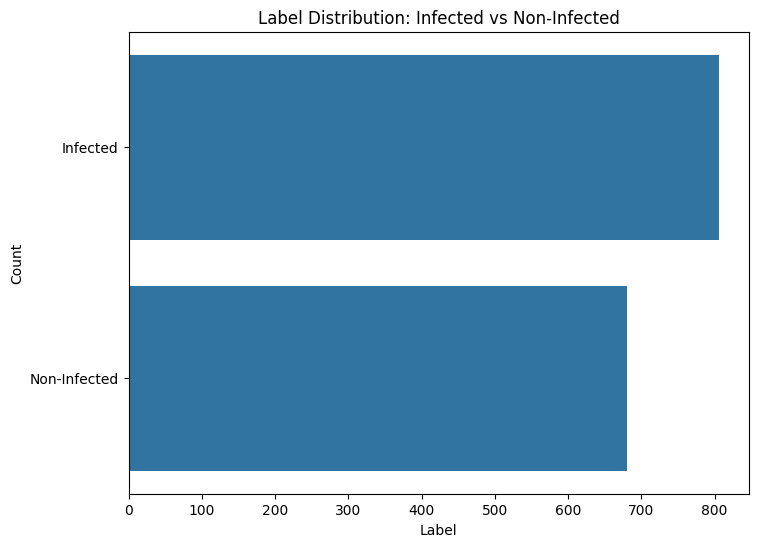

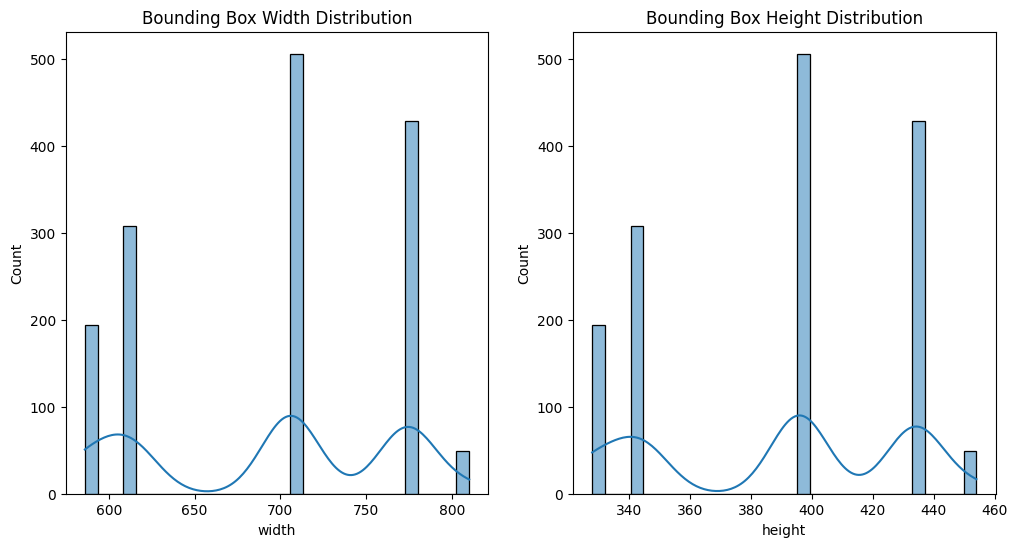

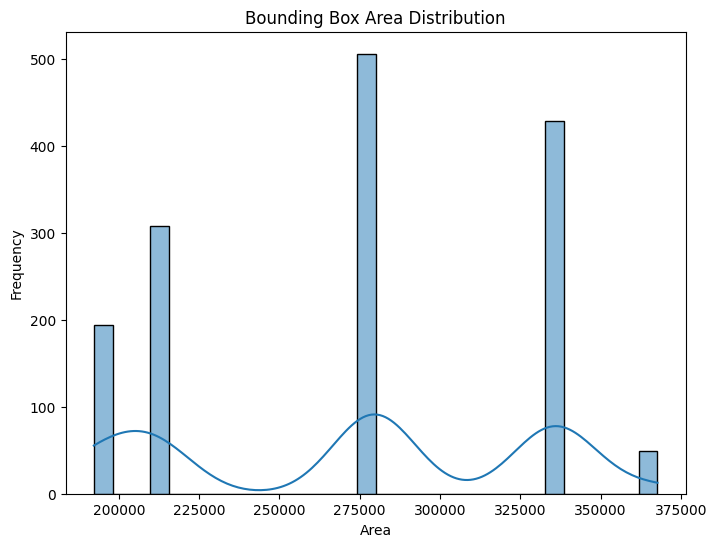

Number of invalid bounding boxes: 0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file containing bounding box data
data = pd.read_csv('annotations/annotations.csv')

# Basic data inspection
print(data.head())
print(data.info())
print(data.describe())

# 1. Label Distribution Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data['label'])
plt.title('Label Distribution: Infected vs Non-Infected')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('label_distribution.png')  # Save the plot as an image
plt.show()

# 2. Bounding Box Properties
# Calculating Bounding Box Area
data['bbox_area'] = data['width'] * data['height']

# Plotting bounding box width and height
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['width'], bins=30, kde=True)
plt.title('Bounding Box Width Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['height'], bins=30, kde=True)
plt.title('Bounding Box Height Distribution')
plt.savefig('bbox_width_height_distribution.png')  # Save the plot as an image
plt.show()

# Plotting bounding box area
plt.figure(figsize=(8, 6))
sns.histplot(data['bbox_area'], bins=30, kde=True)
plt.title('Bounding Box Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.savefig('bbox_area_distribution.png')  # Save the plot as an image
plt.show()

# 3. Data Consistency Checks
# Checking for any bounding box with zero or negative width/height
invalid_boxes = data[(data['width'] <= 0) | (data['height'] <= 0)]
print(f"Number of invalid bounding boxes: {len(invalid_boxes)}")
if len(invalid_boxes) > 0:
    print(invalid_boxes)


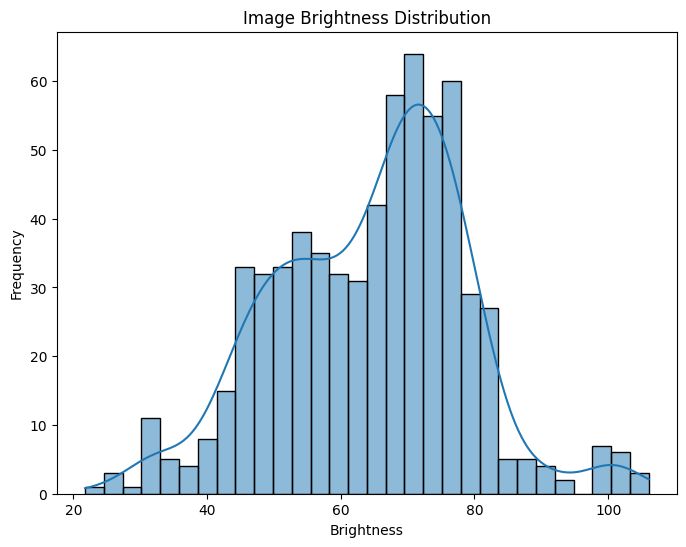

EDA Completed. Summary insights can be reviewed from the generated plots and logs.


In [3]:
from PIL import Image
import numpy as np
import cv2
import os

def calculate_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.mean(image)

image_folder = 'images/train'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
brightness_values = [calculate_brightness(os.path.join(image_folder, f)) for f in image_files]

# Plotting brightness distribution
plt.figure(figsize=(8, 6))
sns.histplot(brightness_values, bins=30, kde=True)
plt.title('Image Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')

# Save the plot as an image
plt.savefig('image_brightness_distribution.png')

plt.show()

print("EDA Completed. Summary insights can be reviewed from the generated plots and logs.")


In [4]:
import os
import pandas as pd

# Load the annotations
annotations_df = pd.read_csv('C:/CholecT50-Challenge-Validation/cholect50-challenge-val/annotations/annotations.csv')
# Load the annotations


# Create a directory for YOLO format annotations
yolo_annotations_dir = 'C:/CholecT50-Challenge-Validation/cholect50-challenge-val/yolo_annotations'
os.makedirs(yolo_annotations_dir, exist_ok=True)

# Function to convert to YOLO format
def convert_to_yolo_format(row):
    width = row['width']
    height = row['height']
    x_center = (row['xmin'] + row['xmax']) / 2 / width
    y_center = (row['ymin'] + row['ymax']) / 2 / height
    bbox_width = (row['xmax'] - row['xmin']) / width
    bbox_height = (row['ymax'] - row['ymin']) / height
    return [row['label'], x_center, y_center, bbox_width, bbox_height]


for filename, group in annotations_df.groupby('filename'):
    # print(f"Processing {filename} with {len(group)} boxes.")  # Check how many boxes are in each file
    yolo_txt_path = os.path.join(yolo_annotations_dir, f"{filename.split('.')[0]}.txt")
    with open(yolo_txt_path, 'w') as f:
        for _, row in group.iterrows():
            class_id = 1 if row['label'] == 'Infected' else 0  # Assign class indices
            bbox = convert_to_yolo_format(row)
            f.write(f"{class_id} {' '.join(map(str, bbox))}\n")


In [5]:
import os

# Folder path containing the text files
txt_folder = "C:/CholecT50-Challenge-Validation/cholect50-challenge-val/yolo_annotations"

# Loop through all text files in the folder
for txt_file in os.listdir(txt_folder):
    if txt_file.endswith(".txt"):
        # Get full path to the file
        file_path = os.path.join(txt_folder, txt_file)
        
        # Read the content of the file
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Process each line and remove the 'Infected' and 'Non-Infected' strings
        updated_lines = []
        for line in lines:
            # Remove "Infected" or "Non-Infected" from the line
            # line = line.replace("Infected", "").strip()
            line = line.replace("Non-", "").strip()
            updated_lines.append(line)
        
        # Write the updated content back to the file
        with open(file_path, 'w') as f:
            f.write("\n".join(updated_lines))

print("Processed all text files successfully.")


Processed all text files successfully.


In [1]:
import os
os.chdir(r'C:/CholecT50-Challenge-Validation/cholect50-challenge-val/yolov5-master')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Channel Shuffle layer
class ChannelShuffle(nn.Module):
    def __init__(self, groups):
        super(ChannelShuffle, self).__init__()
        self.groups = groups

    def forward(self, x):
        batchsize, num_channels, height, width = x.size()
        channels_per_group = num_channels // self.groups
        x = x.view(batchsize, self.groups, channels_per_group, height, width)
        x = torch.transpose(x, 1, 2).contiguous()
        x = x.view(batchsize, -1, height, width)
        return x

# Define the custom network
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()

        # Initial layers
        self.input_layer = nn.Conv2d(3, 24, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(24)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Block 1
        self.conv1 = nn.Conv2d(24, 28, kernel_size=1, groups=4)
        self.bn2 = nn.BatchNorm2d(28)
        self.shuffle1 = ChannelShuffle(groups=4)
        self.dwconv1 = nn.Conv2d(28, 28, kernel_size=3, stride=2, padding=1, groups=28)
        self.bn3 = nn.BatchNorm2d(28)
        self.conv2 = nn.Conv2d(28, 28, kernel_size=1, groups=4)
        self.bn4 = nn.BatchNorm2d(28)

        # Adjust channels and concatenate
        self.adjust_channels = nn.Conv2d(28, 56, kernel_size=1)  # Adjusting x1 channels to match x
        self.concat_layer1 = nn.Conv2d(80, 56, kernel_size=1)   

        # Additional blocks as per MATLAB code
        # Block 2
        self.avg_pool1 = nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
        self.addition_layer1 = nn.Conv2d(56, 56, kernel_size=1)
        
        # Block 3
        self.conv3 = nn.Conv2d(56, 32, kernel_size=1, groups=4)
        self.bn5 = nn.BatchNorm2d(32)
        self.shuffle2 = ChannelShuffle(groups=4)
        self.dwconv2 = nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1, groups=32)
        self.bn6 = nn.BatchNorm2d(32)

        # Block 4
        self.addition_layer2 = nn.Conv2d(88, 68, kernel_size=1)
        
        # Block 5
        self.conv4 = nn.Conv2d(68, 68, kernel_size=1, groups=4)
        self.bn7 = nn.BatchNorm2d(68)
        self.shuffle3 = ChannelShuffle(groups=4)
        self.dwconv3 = nn.Conv2d(68, 68, kernel_size=3, stride=2, padding=1, groups=68)
        self.bn8 = nn.BatchNorm2d(68)
        
        # Block 6
        self.addition_layer3 = nn.Conv2d(136, 68, kernel_size=1)
        
        # Block 7
        self.conv5 = nn.Conv2d(68, 68, kernel_size=1, groups=4)
        self.bn9 = nn.BatchNorm2d(68)
        self.shuffle4 = ChannelShuffle(groups=4)
        self.dwconv4 = nn.Conv2d(68, 68, kernel_size=3, stride=2, padding=1, groups=68)
        self.bn10 = nn.BatchNorm2d(68)
        
        # Block 8
        self.addition_layer4 = nn.Conv2d(136, 68, kernel_size=1)
        
        # Block 9
        self.conv6 = nn.Conv2d(68, 136, kernel_size=1, groups=4)
        self.bn11 = nn.BatchNorm2d(136)
        self.shuffle5 = ChannelShuffle(groups=4)
        self.dwconv5 = nn.Conv2d(136, 136, kernel_size=3, stride=2, padding=1, groups=136)
        self.bn12 = nn.BatchNorm2d(136)
        
        # Block 10
        self.addition_layer5 = nn.Conv2d(204, 136, kernel_size=1)  # Adjust to match concatenated channels

        
        # Final Global Pooling and Fully Connected Layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc_cls = nn.Linear(136, 2)  # Class output (infected/non-infected)
        self.fc_bbox = nn.Linear(136, 4)  # Bounding box output (x_min, y_min, x_max, y_max)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Initial layers
        x = self.input_layer(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        # Block 1
        x1 = self.conv1(x)
        x1 = self.bn2(x1)
        x1 = self.relu(x1)
        x1 = self.shuffle1(x1)
        x1 = self.dwconv1(x1)
        x1 = self.bn3(x1)
        x1 = self.conv2(x1)
        x1 = self.bn4(x1)
        
        x1 = self.adjust_channels(x1)
        x1 = F.interpolate(x1, size=(x.size(2), x.size(3)), mode="bilinear", align_corners=False)
        
        # Block 2 (addition layer)
        x = self.concat_layer1(torch.cat((x, x1), dim=1))
        x = self.relu(x)
        x = self.avg_pool1(x)

        # Block 3
        x2 = self.conv3(x)
        x2 = self.bn5(x2)
        x2 = self.relu(x2)
        x2 = self.shuffle2(x2)
        x2 = self.dwconv2(x2)
        x2 = self.bn6(x2)
        

        # Block 4 (addition layer)
        x2 = F.interpolate(x2, size=(x.size(2), x.size(3)), mode="bilinear", align_corners=False)  # Match x's dimensions
        x = self.addition_layer2(torch.cat((x, x2), dim=1))
        x = self.relu(x)

        # Block 5
        x3 = self.conv4(x)
        x3 = self.bn7(x3)
        x3 = self.relu(x3)
        x3 = self.shuffle3(x3)
        x3 = self.dwconv3(x3)
        x3 = self.bn8(x3)

        # Block 6 (addition layer)
        x3 = F.interpolate(x3, size=(x.size(2), x.size(3)), mode="bilinear", align_corners=False)  # Match x's dimensions
        x = self.addition_layer3(torch.cat((x, x3), dim=1))
        x = self.relu(x)
        # Block 7
        x4 = self.conv5(x)
        x4 = self.bn9(x4)
        x4 = self.relu(x4)
        x4 = self.shuffle4(x4)
        x4 = self.dwconv4(x4)
        x4 = self.bn10(x4)

        # Block 8 (addition layer) - add interpolation to match spatial dimensions
        x4 = F.interpolate(x4, size=(x.size(2), x.size(3)), mode="bilinear", align_corners=False)  # Match x's dimensions
        x = self.addition_layer4(torch.cat((x, x4), dim=1))
        x = self.relu(x)


        # Block 9
        x5 = self.conv6(x)
        x5 = self.bn11(x5)
        x5 = self.relu(x5)
        x5 = self.shuffle5(x5)
        x5 = self.dwconv5(x5)
        x5 = self.bn12(x5)

        # Block 10 (addition layer) - add interpolation to match spatial dimensions
        x5 = F.interpolate(x5, size=(x.size(2), x.size(3)), mode="bilinear", align_corners=False)  # Match x's dimensions
        x = self.addition_layer5(torch.cat((x, x5), dim=1))
        x = self.relu(x)


        # Global Average Pooling
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)

        # Separate outputs for classification and bounding box
        cls_out = self.softmax(self.fc_cls(x))
        bbox_out = self.fc_bbox(x)  # Raw bounding box coordinates
        
        return cls_out, bbox_out

# Instantiate and print the model
model = CustomNet()
print(model)

CustomNet(
  (input_layer): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1): Conv2d(24, 28, kernel_size=(1, 1), stride=(1, 1), groups=4)
  (bn2): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shuffle1): ChannelShuffle()
  (dwconv1): Conv2d(28, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=28)
  (bn3): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(28, 28, kernel_size=(1, 1), stride=(1, 1), groups=4)
  (bn4): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (adjust_channels): Conv2d(28, 56, kernel_size=(1, 1), stride=(1, 1))
  (concat_layer1): Conv2d(80, 56, kernel_size=(1, 1), stride=(1, 1))
  (avg_pool1): AvgPool2d(kernel

In [10]:
!python train.py --img 640 --batch 32 --epochs 100 --data C:/CholecT50-Challenge-Validation/cholect50-challenge-val/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name model

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Error decoding JSON from C:\Users\ryanr\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file âœ… 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ryanr\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Error decoding JSON from C:\Users\ryanr\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file âœ… 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ryanr\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Cre

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=C:/CholecT50-Challenge-Validation/cholect50-challenge-val/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2024-10-6 Python-3.10.0 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [13]:
!python detect.py --weights runs/train/model7/weights/best.pt --img 640 --source C:/CholecT50-Challenge-Validation/cholect50-challenge-val/test/test/

detect: weights=['runs/train/model7/weights/best.pt'], source=C:/CholecT50-Challenge-Validation/cholect50-challenge-val/test/test/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-10-6 Python-3.10.0 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/7 C:\CholecT50-Challenge-Validation\cholect50-challenge-val\test\test\Screenshot 2024-11-15 092932.png: 384x640 1 Non-Infected, 109.6ms
image 2/7 C:\CholecT50-Challenge-Validation\cholect50-challenge-val\test\test\Screenshot 2024-11-15 092951.png: 384x640 2 Infecteds, 103.5ms
image 3/7 C:

In [6]:
import torch
import pandas as pd

# Load the .pt file
model_path = "runs/train/model7/weights/best.pt"
checkpoint = torch.load(model_path, map_location=torch.device('cpu'))

# Check the content of the checkpoint
if "model" in checkpoint:
    model = checkpoint["model"] 
    model.eval()  
else:
    raise ValueError("The loaded checkpoint does not contain a model.")

# Extract architecture details
architecture = []
for name, module in model.named_modules():
    if len(list(module.children())) == 0:  # Skip composite modules
        layer_info = {
            "Layer Name": name,
            "Layer Type": type(module).__name__,
            "Parameters": sum(p.numel() for p in module.parameters()),
            "Trainable": any(p.requires_grad for p in module.parameters())
        }
        architecture.append(layer_info)

# Convert to a DataFrame
df = pd.DataFrame(architecture)

# Save or display the table
print(df)
df.to_csv("model_architecture.csv", index=False)


                Layer Name   Layer Type  Parameters  Trainable
0             model.0.conv       Conv2d        3456      False
1               model.0.bn  BatchNorm2d          64      False
2              model.0.act         SiLU           0      False
3             model.1.conv       Conv2d       18432      False
4               model.1.bn  BatchNorm2d         128      False
..                     ...          ...         ...        ...
120  model.23.m.0.cv2.conv       Conv2d      589824      False
121    model.23.m.0.cv2.bn  BatchNorm2d         512      False
122           model.24.m.0       Conv2d        2709      False
123           model.24.m.1       Conv2d        5397      False
124           model.24.m.2       Conv2d       10773      False

[125 rows x 4 columns]


In [2]:
!pip install torchsummary


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
